## Objectives

* Primary objective is to perform several different operations in Python that you might normally do in excel.


**Operations Covered:**

1) Explore features of the data set

2) Sort columns

3) Filter columns

4) Creating new features

5) Calculating summary statistics

6) Pivot tables

7) Data Visualization

**Data comes from the `pybaseball` library:** https://pypi.org/project/pybaseball/

## Load Libraries & Data

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pybaseball import pitching_stats
import seaborn as sns

In [154]:
pitchers = pitching_stats(2012, 2016)

In [155]:
pitchers.head(10)

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
4,2036,2015,Clayton Kershaw,LAD,27,16,7,8.6,2.13,33,...,8.9,15,0.028,113.3,132,0.244,542,0.164,0.323,NaN
2,2036,2014,Clayton Kershaw,LAD,26,21,3,7.9,1.77,27,...,NaN,0,NaN,NaN,0,NaN,0,0.161,0.303,NaN
14,2429,2014,Corey Kluber,CLE,28,18,9,7.2,2.44,34,...,NaN,0,NaN,NaN,0,NaN,0,0.203,0.323,NaN
3,2036,2013,Clayton Kershaw,LAD,25,16,9,7.2,1.83,33,...,NaN,0,NaN,NaN,0,NaN,0,0.178,0.293,NaN
1,4153,2015,Jake Arrieta,CHC,29,22,6,7.0,1.77,33,...,4.4,13,0.022,111.5,143,0.247,580,0.177,0.287,NaN
27,8700,2012,Justin Verlander,DET,29,17,8,6.9,2.64,33,...,NaN,0,NaN,NaN,0,NaN,0,0.167,0.285,NaN
10,11713,2013,Matt Harvey,NYM,24,9,5,6.9,2.27,26,...,NaN,0,NaN,NaN,0,NaN,0,0.160,0.286,NaN
15,3184,2015,David Price,- - -,29,18,5,6.7,2.45,32,...,12.7,27,0.044,114.7,187,0.305,613,0.175,0.294,NaN
77,4772,2012,Felix Hernandez,SEA,26,13,9,6.6,3.06,33,...,NaN,0,NaN,NaN,0,NaN,0,0.177,0.285,NaN
44,3137,2015,Max Scherzer,WSN,30,14,12,6.5,2.79,33,...,17.1,30,0.051,114.7,173,0.296,584,0.157,0.310,NaN


In [156]:
pitchers.columns

Index(['IDfg', 'Season', 'Name', 'Team', 'Age', 'W', 'L', 'WAR', 'ERA', 'G',
       ...
       'LA', 'Barrels', 'Barrel%', 'maxEV', 'HardHit', 'HardHit%', 'Events',
       'CStr%', 'CSW%', 'xERA'],
      dtype='object', length=334)

**Notice that `pandas` doesn't show us all 334 column names. We can see them with the following code.**

In [157]:
pitchers.columns.tolist()

['IDfg',
 'Season',
 'Name',
 'Team',
 'Age',
 'W',
 'L',
 'WAR',
 'ERA',
 'G',
 'GS',
 'CG',
 'ShO',
 'SV',
 'BS',
 'IP',
 'TBF',
 'H',
 'R',
 'ER',
 'HR',
 'BB',
 'IBB',
 'HBP',
 'WP',
 'BK',
 'SO',
 'GB',
 'FB',
 'LD',
 'IFFB',
 'Balls',
 'Strikes',
 'Pitches',
 'RS',
 'IFH',
 'BU',
 'BUH',
 'K/9',
 'BB/9',
 'K/BB',
 'H/9',
 'HR/9',
 'AVG',
 'WHIP',
 'BABIP',
 'LOB%',
 'FIP',
 'GB/FB',
 'LD%',
 'GB%',
 'FB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'Starting',
 'Start-IP',
 'Relieving',
 'Relief-IP',
 'RAR',
 'Dollars',
 'tERA',
 'xFIP',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'inLI',
 'gmLI',
 'exLI',
 'Pulls',
 'WPA/LI',
 'Clutch',
 'FB% 2',
 'FBv',
 'SL%',
 'SLv',
 'CT%',
 'CTv',
 'CB%',
 'CBv',
 'CH%',
 'CHv',
 'SF%',
 'SFv',
 'KN%',
 'KNv',
 'XX%',
 'PO%',
 'wFB',
 'wSL',
 'wCT',
 'wCB',
 'wCH',
 'wSF',
 'wKN',
 'wFB/C',
 'wSL/C',
 'wCT/C',
 'wCB/C',
 'wCH/C',
 'wSF/C',
 'wKN/C',
 'O-Swing%',
 'Z-Swing%',
 'Swing%',
 'O-Contact%',
 'Z-Contact%',
 'Contact%',
 'Zone%'

## 1) Explore the Features of the Dataset

In [158]:
## Look at the type of data frame

type(pitchers)

pandas.core.frame.DataFrame

In [159]:
## General info about the columns in the data frame

pitchers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 4 to 407
Columns: 334 entries, IDfg to xERA
dtypes: float64(266), int64(64), object(4)
memory usage: 1.0+ MB


In [160]:
## Number of rows and columns

pitchers.shape

(408, 334)

In [161]:
# Find if there are NAs in any columns

pitchers.isnull().any()

IDfg        False
Season      False
Name        False
Team        False
Age         False
            ...  
HardHit%     True
Events      False
CStr%       False
CSW%        False
xERA         True
Length: 334, dtype: bool

In [162]:
# How many NAs in each column?

len(pitchers) - pitchers.count()

IDfg          0
Season        0
Name          0
Team          0
Age           0
           ... 
HardHit%    257
Events        0
CStr%         0
CSW%          0
xERA        408
Length: 334, dtype: int64

## 2) Sort Columns

In [163]:
## Sort the data by pitcher name

pitchers.sort_values(by='Name')

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
352,512,2014,A.J. Burnett,PHI,37,8,18,1.7,4.59,34,...,NaN,0,NaN,NaN,0,NaN,0,0.185,0.270,NaN
109,512,2013,A.J. Burnett,PIT,36,10,11,4.0,3.30,30,...,NaN,0,NaN,NaN,0,NaN,0,0.200,0.307,NaN
95,512,2015,A.J. Burnett,PIT,38,9,7,2.6,3.18,26,...,5.7,20,0.04,113.0,194,0.391,496,0.193,0.282,NaN
168,512,2012,A.J. Burnett,PIT,35,16,10,3.5,3.51,31,...,NaN,0,NaN,NaN,0,NaN,0,0.187,0.283,NaN
248,11132,2013,A.J. Griffin,OAK,25,14,10,1.5,3.82,32,...,NaN,0,NaN,NaN,0,NaN,0,0.196,0.282,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,1943,2013,Zack Greinke,LAD,29,15,4,3.4,2.63,28,...,NaN,0,NaN,NaN,0,NaN,0,0.159,0.264,NaN
0,1943,2015,Zack Greinke,LAD,31,19,3,5.3,1.66,32,...,9.8,24,0.04,113.9,165,0.276,598,0.161,0.281,NaN
158,1943,2012,Zack Greinke,- - -,28,15,5,4.8,3.48,34,...,NaN,0,NaN,NaN,0,NaN,0,0.197,0.284,NaN
33,1943,2014,Zack Greinke,LAD,30,17,8,4.5,2.71,32,...,NaN,0,NaN,NaN,0,NaN,0,0.172,0.288,NaN


In [164]:
## Sort the data by season

pitchers.sort_values(by = 'Season')

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
108,5551,2012,Matt Harrison,TEX,26,18,11,3.5,3.29,32,...,NaN,0,NaN,NaN,0,NaN,0,0.191,0.270,NaN
21,3184,2012,David Price,TBR,26,20,5,4.3,2.56,31,...,NaN,0,NaN,NaN,0,NaN,0,0.209,0.294,NaN
205,8678,2012,Paul Maholm,- - -,30,13,11,1.7,3.67,32,...,NaN,0,NaN,NaN,0,NaN,0,0.198,0.273,NaN
273,3551,2012,Clayton Richard,SDP,28,14,14,0.4,3.99,33,...,NaN,0,NaN,NaN,0,NaN,0,0.183,0.246,NaN
353,2717,2012,Rick Porcello,DET,23,10,12,3.0,4.59,31,...,NaN,0,NaN,NaN,0,NaN,0,0.174,0.250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7410,2016,J.A. Happ,TOR,33,20,4,2.8,3.18,32,...,12.2,37,0.065,113.6,211,0.372,567,0.162,0.258,NaN
279,6345,2016,Chris Archer,TBR,27,9,19,2.9,4.02,33,...,10.3,42,0.077,112.5,220,0.402,547,0.174,0.296,NaN
123,1507,2016,John Lackey,CHC,37,11,8,2.9,3.35,29,...,14.4,27,0.053,111.9,191,0.377,506,0.166,0.280,NaN
161,18498,2016,Kenta Maeda,LAD,28,16,11,2.9,3.48,32,...,12.7,25,0.052,111.2,121,0.253,479,0.185,0.301,NaN


In [165]:
## Sort the data by ERA from lowest to highest

pitchers.sort_values(by = 'ERA')

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
0,1943,2015,Zack Greinke,LAD,31,19,3,5.3,1.66,32,...,9.8,24,0.040,113.9,165,0.276,598,0.161,0.281,NaN
2,2036,2014,Clayton Kershaw,LAD,26,21,3,7.9,1.77,27,...,NaN,0,NaN,NaN,0,NaN,0,0.161,0.303,NaN
1,4153,2015,Jake Arrieta,CHC,29,22,6,7.0,1.77,33,...,4.4,13,0.022,111.5,143,0.247,580,0.177,0.287,NaN
3,2036,2013,Clayton Kershaw,LAD,25,16,9,7.2,1.83,33,...,NaN,0,NaN,NaN,0,NaN,0,0.178,0.293,NaN
4,2036,2015,Clayton Kershaw,LAD,27,16,7,8.6,2.13,33,...,8.9,15,0.028,113.3,132,0.244,542,0.164,0.323,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,3374,2012,Ubaldo Jimenez,CLE,28,9,17,0.9,5.40,31,...,NaN,0,NaN,NaN,0,NaN,0,0.177,0.250,NaN
404,3990,2013,Edinson Volquez,- - -,29,9,12,0.8,5.71,33,...,NaN,0,NaN,NaN,0,NaN,0,0.180,0.267,NaN
405,6943,2012,Luke Hochevar,KCR,28,8,16,1.4,5.73,32,...,NaN,0,NaN,NaN,0,NaN,0,0.180,0.267,NaN
406,3403,2012,Ricky Romero,TOR,27,9,14,0.4,5.77,32,...,NaN,0,NaN,NaN,0,NaN,0,0.151,0.235,NaN


In [166]:
## Sort the data by ERA from highest to lowest

pitchers.sort_values(by = 'ERA', ascending = False)

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
407,7059,2016,James Shields,- - -,34,6,19,-1.0,5.85,33,...,12.8,46,0.077,115.8,198,0.332,597,0.153,0.245,NaN
406,3403,2012,Ricky Romero,TOR,27,9,14,0.4,5.77,32,...,NaN,0,NaN,NaN,0,NaN,0,0.151,0.235,NaN
405,6943,2012,Luke Hochevar,KCR,28,8,16,1.4,5.73,32,...,NaN,0,NaN,NaN,0,NaN,0,0.180,0.267,NaN
404,3990,2013,Edinson Volquez,- - -,29,9,12,0.8,5.71,33,...,NaN,0,NaN,NaN,0,NaN,0,0.180,0.267,NaN
403,3374,2012,Ubaldo Jimenez,CLE,28,9,17,0.9,5.40,31,...,NaN,0,NaN,NaN,0,NaN,0,0.177,0.250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,12049,2016,Kyle Hendricks,CHC,26,16,8,4.2,2.13,31,...,10.1,16,0.031,114.3,136,0.260,523,0.221,0.321,NaN
3,2036,2013,Clayton Kershaw,LAD,25,16,9,7.2,1.83,33,...,NaN,0,NaN,NaN,0,NaN,0,0.178,0.293,NaN
1,4153,2015,Jake Arrieta,CHC,29,22,6,7.0,1.77,33,...,4.4,13,0.022,111.5,143,0.247,580,0.177,0.287,NaN
2,2036,2014,Clayton Kershaw,LAD,26,21,3,7.9,1.77,27,...,NaN,0,NaN,NaN,0,NaN,0,0.161,0.303,NaN


## 3) Filter

In [167]:
## Filter to only see the 2012 season
# Keep only columns: Name, Team, Age, G, W, L, WAR, and ERA

season2012 = pitchers.loc[pitchers['Season']== 2012, ['Name', 'Team', 'Age', 'G', 'W', 'L', 'WAR', 'ERA']]
season2012.head()

,Name,Team,Age,G,W,L,WAR,ERA
27,Justin Verlander,DET,29,33,17,8,6.9,2.64
77,Felix Hernandez,SEA,26,33,13,9,6.6,3.06
19,Clayton Kershaw,LAD,24,33,14,9,6.1,2.53
54,Gio Gonzalez,WSN,26,32,21,8,5.0,2.89
93,Cliff Lee,PHI,33,30,6,9,5.0,3.16


In [168]:
## Filter Clayton Kershaw's seasons
# Keep only columns: Season, Name, Team, Age, G, W, L, WAR, and ERA
# arrange the data set from earliest season to latest

kershaw = pitchers.loc[pitchers['Name']=='Clayton Kershaw', ['Season', 'Name', 'Team', 'Age', 'G', 'W', 'L', 'WAR', 'ERA']].sort_values('Season', ascending = True)
kershaw.head()

,Season,Name,Team,Age,G,W,L,WAR,ERA
19,2012,Clayton Kershaw,LAD,24,33,14,9,6.1,2.53
3,2013,Clayton Kershaw,LAD,25,33,16,9,7.2,1.83
2,2014,Clayton Kershaw,LAD,26,27,21,3,7.9,1.77
4,2015,Clayton Kershaw,LAD,27,33,16,7,8.6,2.13


In [169]:
## Create a smaller data set
# Keep only columns: Season, Name, Team, Age, G, W, L, WAR, ERA, Start-IP, and Relief-IP
# arrange the data set from earliest season to latest for each pitcher

pitchers_small = pitchers[['Season', 'Name', 'Team', 'Age', 'G', 'W', 'L', 'WAR', 'ERA', 'Start-IP','Relief-IP']].sort_values(['Name', 'Season'], ascending = True)
pitchers_small.head(30)

,Season,Name,Team,Age,G,W,L,WAR,ERA,Start-IP,Relief-IP
168,2012,A.J. Burnett,PIT,35,31,16,10,3.5,3.51,202.1,NaN
109,2013,A.J. Burnett,PIT,36,30,10,11,4.0,3.30,191.0,NaN
352,2014,A.J. Burnett,PHI,37,34,8,18,1.7,4.59,213.2,NaN
95,2015,A.J. Burnett,PIT,38,26,9,7,2.6,3.18,164.0,NaN
248,2013,A.J. Griffin,OAK,25,32,14,10,1.5,3.82,200.0,NaN
190,2012,Aaron Harang,LAD,34,31,10,10,2.2,3.61,179.2,NaN
184,2014,Aaron Harang,ATL,36,33,12,12,2.8,3.57,204.1,NaN
381,2015,Aaron Harang,PHI,37,29,6,15,1.2,4.86,172.1,NaN
64,2016,Aaron Sanchez,TOR,23,30,15,2,3.5,3.00,192.0,NaN
263,2012,Adam Wainwright,STL,30,32,14,13,3.9,3.94,198.2,NaN


## 4) Creating New Features

In [170]:
## Add a sequence counter for each season for each pitcher

pitchers_small['season_id'] = pitchers_small.groupby(['Name']).cumcount() + 1
pitchers_small.head(30)

,Season,Name,Team,Age,G,W,L,WAR,ERA,Start-IP,Relief-IP,season_id
168,2012,A.J. Burnett,PIT,35,31,16,10,3.5,3.51,202.1,NaN,1
109,2013,A.J. Burnett,PIT,36,30,10,11,4.0,3.30,191.0,NaN,2
352,2014,A.J. Burnett,PHI,37,34,8,18,1.7,4.59,213.2,NaN,3
95,2015,A.J. Burnett,PIT,38,26,9,7,2.6,3.18,164.0,NaN,4
248,2013,A.J. Griffin,OAK,25,32,14,10,1.5,3.82,200.0,NaN,1
190,2012,Aaron Harang,LAD,34,31,10,10,2.2,3.61,179.2,NaN,1
184,2014,Aaron Harang,ATL,36,33,12,12,2.8,3.57,204.1,NaN,2
381,2015,Aaron Harang,PHI,37,29,6,15,1.2,4.86,172.1,NaN,3
64,2016,Aaron Sanchez,TOR,23,30,15,2,3.5,3.00,192.0,NaN,1
263,2012,Adam Wainwright,STL,30,32,14,13,3.9,3.94,198.2,NaN,1


In [171]:
## Create a new column called 'age_group'

# create conditions for the age_group bins

bins = [
    (pitchers_small['Age'] <= 25),
    (pitchers_small['Age'] > 25) & (pitchers_small['Age'] <= 30),
    (pitchers_small['Age'] > 30) & (pitchers_small['Age'] <= 35),
    (pitchers_small['Age'] > 35) & (pitchers_small['Age'] <= 40),
    (pitchers_small['Age'] > 40)
]

# create the age_group names to be assigned to each bin

age_group = ['<= 25', '25 to 30', '31 to 35', '36 to 40', '> 40']

# add the age_group bins into the data

pitchers_small['age_group'] = np.select(bins, age_group)

pitchers_small.head(10)

,Season,Name,Team,Age,G,W,L,WAR,ERA,Start-IP,Relief-IP,season_id,age_group
168,2012,A.J. Burnett,PIT,35,31,16,10,3.5,3.51,202.1,NaN,1,31 to 35
109,2013,A.J. Burnett,PIT,36,30,10,11,4.0,3.30,191.0,NaN,2,36 to 40
352,2014,A.J. Burnett,PHI,37,34,8,18,1.7,4.59,213.2,NaN,3,36 to 40
95,2015,A.J. Burnett,PIT,38,26,9,7,2.6,3.18,164.0,NaN,4,36 to 40
248,2013,A.J. Griffin,OAK,25,32,14,10,1.5,3.82,200.0,NaN,1,<= 25
190,2012,Aaron Harang,LAD,34,31,10,10,2.2,3.61,179.2,NaN,1,31 to 35
184,2014,Aaron Harang,ATL,36,33,12,12,2.8,3.57,204.1,NaN,2,36 to 40
381,2015,Aaron Harang,PHI,37,29,6,15,1.2,4.86,172.1,NaN,3,36 to 40
64,2016,Aaron Sanchez,TOR,23,30,15,2,3.5,3.00,192.0,NaN,1,<= 25
263,2012,Adam Wainwright,STL,30,32,14,13,3.9,3.94,198.2,NaN,1,25 to 30


In [172]:
## Create a pitcher_type column which makes a distinction between starters and relievers

pitchers_small['pitcher_type'] = np.where(pitchers_small['Start-IP'] >= pitchers_small['Start-IP'].median(), 'starter', 'reliever') 
pitchers_small.head()

,Season,Name,Team,Age,G,W,L,WAR,ERA,Start-IP,Relief-IP,season_id,age_group,pitcher_type
168,2012,A.J. Burnett,PIT,35,31,16,10,3.5,3.51,202.1,NaN,1,31 to 35,starter
109,2013,A.J. Burnett,PIT,36,30,10,11,4.0,3.30,191.0,NaN,2,36 to 40,starter
352,2014,A.J. Burnett,PHI,37,34,8,18,1.7,4.59,213.2,NaN,3,36 to 40,starter
95,2015,A.J. Burnett,PIT,38,26,9,7,2.6,3.18,164.0,NaN,4,36 to 40,reliever
248,2013,A.J. Griffin,OAK,25,32,14,10,1.5,3.82,200.0,NaN,1,<= 25,starter


## 5) Calculating Summary Statistics

In [173]:
## Get summary stats for each column

pitchers_small.describe()

,Season,Age,G,W,L,WAR,ERA,Start-IP,Relief-IP,season_id
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,61.000000,408.000000
mean,2013.919118,28.767157,31.487745,12.360294,10.122549,2.798529,3.705441,192.015441,4.934426,1.941176
std,1.402289,4.044252,1.840000,3.323669,2.856895,1.552646,0.742643,18.953453,5.774077,1.117856
min,2012.000000,20.000000,25.000000,6.000000,2.000000,-1.000000,1.660000,138.200000,0.000000,1.000000
25%,2013.000000,26.000000,30.000000,10.000000,8.000000,1.700000,3.210000,177.100000,1.100000,1.000000
50%,2014.000000,28.000000,32.000000,12.000000,10.000000,2.650000,3.665000,190.600000,2.200000,2.000000
75%,2015.000000,31.000000,33.000000,14.000000,12.000000,3.500000,4.180000,204.100000,7.000000,3.000000
max,2016.000000,43.000000,42.000000,22.000000,19.000000,8.600000,5.850000,247.400000,30.200000,5.000000


In [174]:
## Get the mean ERA

pitchers_small['ERA'].mean()

3.705441176470588

In [175]:
## Get the standard deviation of ERA

pitchers_small['ERA'].std()

0.7426433970651792

In [176]:
## How many pitcher observations per season?

pitchers_small['Season'].value_counts()

2014    88
2012    88
2013    81
2015    78
2016    73
Name: Season, dtype: int64

## 6) Pivot Tables

In [177]:
## Pivot Table of counts of wins across seasons

pd.crosstab(pitchers_small['Season'], pitchers_small['W'])

W,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
Season,,,,,,,,,,,,,,,,,
2012,1,2,5,8,7,8,14,11,6,5,11,3,2,1,3,1,0
2013,0,1,6,7,11,11,8,8,15,6,3,1,1,2,0,1,0
2014,1,3,11,4,9,9,5,12,10,11,4,2,4,0,2,1,0
2015,5,3,2,9,3,18,6,11,8,2,1,2,3,3,1,0,1
2016,2,3,4,10,8,8,6,6,4,5,8,2,3,1,2,0,1


In [178]:
## Pivot Table of the Average Age by season

pitchers_small.pivot_table(values = ['Age'], index = ['Season'], aggfunc = np.mean)

,Age
Season,
2012,28.352273
2013,28.617284
2014,29.227273
2015,28.769231
2016,28.876712


In [179]:
## Pivot Table of Average and Standard Deviation of Wins by Season
# Round the results to 1 significant digit

round(pitchers_small.pivot_table(values = ['Age'], index = ['Season'], aggfunc = (np.mean, np.std)), ndigits = 1)

Age     
        mean  std
Season           
2012    28.4  3.7
2013    28.6  4.3
2014    29.2  4.2
2015    28.8  4.0
2016    28.9  4.1

In [180]:
## Alternate approach to creating a pivot table using group_by()
# Get the median number of losses by season

pitchers_small[['Season', 'L']].groupby(['Season']).median()

,L
Season,
2012,10.5
2013,10.0
2014,10.5
2015,10.0
2016,10.0


In [181]:
## How many observations of each Age are there?

pitchers_small['Age'].value_counts()

27    49
25    41
28    41
29    38
26    36
31    30
24    28
30    27
33    21
23    19
32    18
34    16
35    12
36     8
22     5
37     5
38     4
41     3
39     2
40     2
43     1
42     1
20     1
Name: Age, dtype: int64

In [182]:
# How many players in each age group?

pitchers_small['age_group'].value_counts()

25 to 30    191
31 to 35     97
<= 25        94
36 to 40     21
> 40          5
Name: age_group, dtype: int64

In [183]:
## Calculate the average WAR per season across age group

pitchers_small.pivot_table(values = ['WAR'], index = ['Season'], columns = ['age_group'], aggfunc = np.mean)

WAR                                   
age_group  25 to 30  31 to 35  36 to 40     <= 25 > 40
Season                                                
2012       2.669048  2.440909  3.233333  2.514286  NaN
2013       3.105405  2.600000  2.466667  3.247619  2.7
2014       3.152500  1.872727  2.000000  2.847368  2.8
2015       3.220000  2.637500  2.220000  3.000000  2.5
2016       2.978125  2.309524  2.900000  3.094118  1.6

In [184]:
# How many pitchers in each group?

pitchers_small['pitcher_type'].value_counts()

reliever    204
starter     204
Name: pitcher_type, dtype: int64

## 7) Data Visualization

Text(0.5, 0, 'WAR')

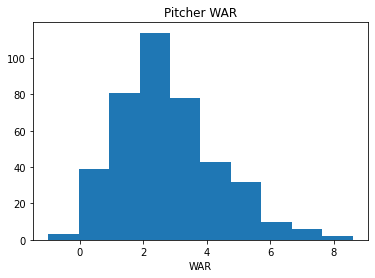

In [186]:
# histogram of WAR values

plt.hist(x = pitchers_small['WAR'])

# Add title and axis names
plt.title('Pitcher WAR')
plt.xlabel('WAR')

<AxesSubplot:xlabel='WAR', ylabel='Density'>

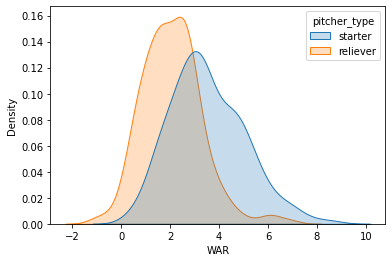

In [187]:
# Density plot of WAR by pitcher type

sns.kdeplot(x = pitchers_small['WAR'], shade = True, hue = pitchers_small['pitcher_type'])

<AxesSubplot:xlabel='WAR', ylabel='age_group'>

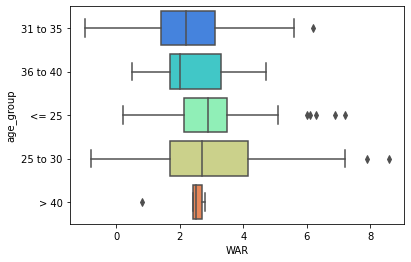

In [188]:
# Boxplot of WAR by age_group

sns.boxplot(x = 'WAR', y = 'age_group', data = pitchers_small, orient = 'h', palette = 'rainbow')

Text(0, 0.5, 'WAR')

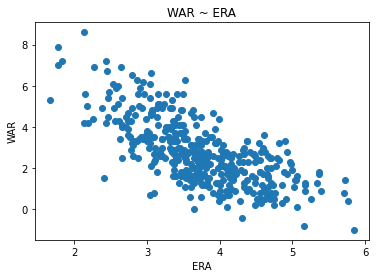

In [189]:
# Scatter plot of WAR and ERA

plt.scatter(x = pitchers_small['ERA'], y = pitchers_small['WAR'])

# plot and axes titles
plt.title('WAR ~ ERA')
plt.xlabel('ERA')
plt.ylabel('WAR')

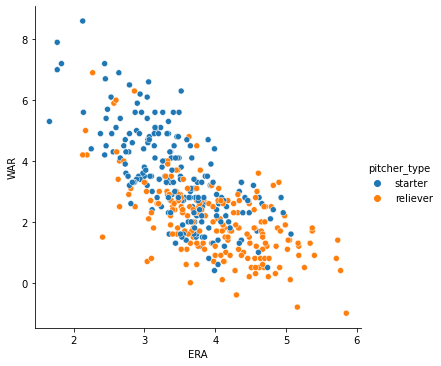

In [190]:
# Scatter plot of WAR and ERA colored by pitcher_type

sns.relplot(x = pitchers_small['ERA'], y = pitchers_small['WAR'], hue = pitchers_small['pitcher_type'])

<AxesSubplot:xlabel='age_group', ylabel='count'>

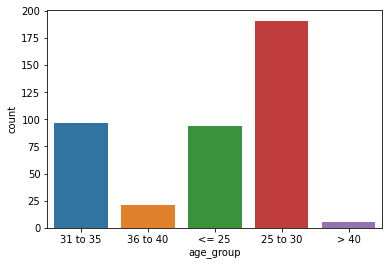

In [191]:
# Barplot of the pitchers in each age_group

sns.countplot(x = 'age_group', data = pitchers_small)

Text(0.5, 1.0, 'Clayton Kershaw: ERA by Season')

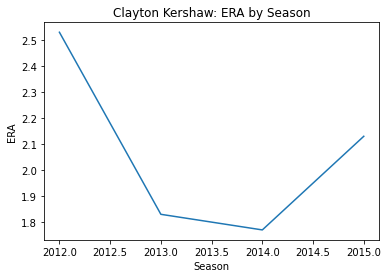

In [192]:
# Line plot of Kersaw's ERA in each season of the data

sns.lineplot(x = 'Season', y = 'ERA', data = kershaw)
plt.title('Clayton Kershaw: ERA by Season')

Text(0.5, 1.0, 'Pitchers ERA by Season ID')

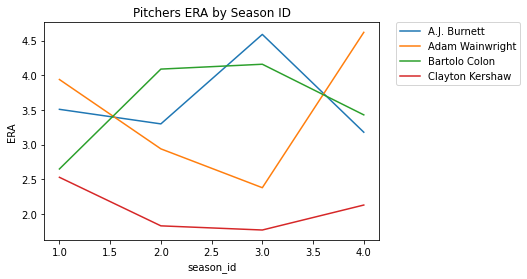

In [193]:
## Line plot for a few pitchers over the same time period

# Select the pitchers of interest
pitcher_list = ['Clayton Kershaw', 'A.J. Burnett', 'Bartolo Colon', 'Adam Wainwright']

# Create the plot (use season_id instead of the season year)
sns.lineplot(x = 'season_id',
            y = 'ERA',
            data = pitchers_small[pitchers_small['Name'].isin(pitcher_list)],
            hue = 'Name')

# put the legend on the outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Pitchers ERA by Season ID")